In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt

pickle_file = 'SVHN_multi.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (230070, 32, 32, 1) (230070, 6)
Validation set (5684, 32, 32, 1) (5684, 6)
Test set (13068, 32, 32, 1) (13068, 6)


In [3]:
image_size = 32
num_labels = 11
num_channels = 1

sess = tf.InteractiveSession()

x_image = tf.placeholder(tf.float32, shape=(None, 32, 32, 1), name="x_image")
y = tf.placeholder(tf.int64, shape=(None, 6), name="y")

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([4096, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.contrib.layers.flatten(h_pool2)
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32, name="keep_prob")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_1 = weight_variable([1024, 11])
b_1 = bias_variable([11])
W_2 = weight_variable([1024, 11])
b_2 = bias_variable([11])
W_3 = weight_variable([1024, 11])
b_3 = bias_variable([11])
W_4 = weight_variable([1024, 11])
b_4 = bias_variable([11])
W_5 = weight_variable([1024, 11])
b_5 = bias_variable([11])

y_1 = tf.matmul(h_fc1_drop, W_1) + b_1
y_2 = tf.matmul(h_fc1_drop, W_2) + b_2
y_3 = tf.matmul(h_fc1_drop, W_3) + b_3
y_4 = tf.matmul(h_fc1_drop, W_4) + b_4
y_5 = tf.matmul(h_fc1_drop, W_5) + b_5

y_pred = tf.stack([y_1,y_2,y_3,y_4,y_5])

y_pred_class = tf.transpose(tf.argmax(y_pred, dimension=2))
y_pred_class = tf.identity(y_pred_class, name='y_pred_class')

Initialized
step 0, Batch accuracy 0
Valid accuracy 0
step 100, Batch accuracy 0.0234375
Valid accuracy 0.00738916
step 200, Batch accuracy 0.0234375
Valid accuracy 0.0124912
step 300, Batch accuracy 0.0234375
Valid accuracy 0.0202322
step 400, Batch accuracy 0.0234375
Valid accuracy 0.0283251
step 500, Batch accuracy 0.03125
Valid accuracy 0.0376495
step 600, Batch accuracy 0.078125
Valid accuracy 0.0476777
step 700, Batch accuracy 0.09375
Valid accuracy 0.0666784
step 800, Batch accuracy 0.0859375
Valid accuracy 0.0798733
step 900, Batch accuracy 0.117188
Valid accuracy 0.0939479
step 1000, Batch accuracy 0.164062
Valid accuracy 0.110837
step 1100, Batch accuracy 0.140625
Valid accuracy 0.124736
step 1200, Batch accuracy 0.125
Valid accuracy 0.143561
step 1300, Batch accuracy 0.195312
Valid accuracy 0.161506
step 1400, Batch accuracy 0.210938
Valid accuracy 0.177692
step 1500, Batch accuracy 0.203125
Valid accuracy 0.194581
step 1600, Batch accuracy 0.21875
Valid accuracy 0.195285
st

Valid accuracy 0.72924
step 14000, Batch accuracy 0.859375
Valid accuracy 0.726777
step 14100, Batch accuracy 0.835938
Valid accuracy 0.727657
step 14200, Batch accuracy 0.71875
Valid accuracy 0.726249
step 14300, Batch accuracy 0.78125
Valid accuracy 0.719916
step 14400, Batch accuracy 0.804688
Valid accuracy 0.73012
step 14500, Batch accuracy 0.828125
Valid accuracy 0.730471
step 14600, Batch accuracy 0.875
Valid accuracy 0.739268
step 14700, Batch accuracy 0.773438
Valid accuracy 0.73311
step 14800, Batch accuracy 0.859375
Valid accuracy 0.737333
step 14900, Batch accuracy 0.828125
Valid accuracy 0.737333
step 15000, Batch accuracy 0.789062
Valid accuracy 0.733638
step 15100, Batch accuracy 0.8125
Valid accuracy 0.736981
step 15200, Batch accuracy 0.835938
Valid accuracy 0.730999
step 15300, Batch accuracy 0.828125
Valid accuracy 0.74525
step 15400, Batch accuracy 0.84375
Valid accuracy 0.738037
step 15500, Batch accuracy 0.859375
Valid accuracy 0.735749
step 15600, Batch accuracy 0

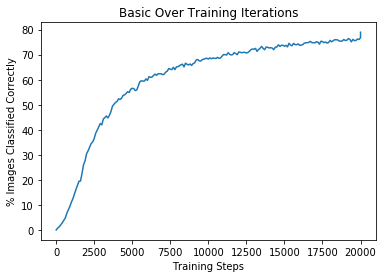

In [4]:
batch_size=128
cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,1], logits=y_1) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,2], logits=y_2) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,3], logits=y_3) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,4], logits=y_4) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,5], logits=y_5))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_predictions = tf.reduce_min(tf.cast(tf.equal(y_pred_class,y[:,1:]), tf.float32),1)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32), name="accuracy")
sess.run(tf.global_variables_initializer())
print('Initialized')
accuracy_curve = []
for step in range(20001):
    offset = (step * batch_size) % (train_dataset.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    if step%100 == 0:
        acc = sess.run(accuracy,feed_dict={x_image : batch_data, y : batch_labels, keep_prob : 1.0})
        print("step %d, Batch accuracy %g"%(step, acc))
        acc = sess.run(accuracy,feed_dict={x_image : valid_dataset, y : valid_labels, keep_prob : 1.0}) 
        print("Valid accuracy %g"%acc)
        accuracy_curve.append((step,100.0*acc))
    train_step.run(feed_dict={x_image: batch_data, y : batch_labels, keep_prob: 0.5})
acc = sess.run(accuracy,feed_dict={x_image : test_dataset, y : test_labels, keep_prob : 1.0}) 
print("Test accuracy %g"%acc)
accuracy_curve.append((20001,100.0*acc))
save_model_path = './multi_digit_classification'
# Save Model
saver = tf.train.Saver()
save_path = saver.save(sess, save_model_path)

plt.plot(*zip(*accuracy_curve))
plt.title('Basic Over Training Iterations')
plt.xlabel('Training Steps')
plt.ylabel('% Images Classified Correctly')
plt.show()

In [6]:
import tensorflow as tf
import pickle
import random

# Set batch size if not already set
save_model_path = './multi_digit_classification'

def test_model():
    """
    Test the saved model against the test dataset
    """

    pickle_file = 'google_images.pickle'

    with open(pickle_file, 'rb') as f:
        save = pickle.load(f)
        gtest_features = save['real_test_dataset']
        gtest_labels = save['real_test_labels']
        del save  # hint to help gc free up memory
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x_image:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('y_pred_class:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Check accuracy in predicting images taken from Google images
        test_batch_acc_total, predictions = sess.run(
                [loaded_acc,loaded_logits],
                feed_dict={loaded_x: gtest_features, loaded_y: gtest_labels, loaded_keep_prob: 1.0})

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total))
        for i in range(len(predictions)):
            print('Predicted: ',predictions[i],' Actual: ',gtest_labels[i][1:])
            
        predictions = sess.run(loaded_logits, 
                               feed_dict={loaded_x : test_dataset, loaded_y : test_labels, loaded_keep_prob : 1.0})
        
        blanks = 0
        for pred in predictions:
            if pred[4] == 10:
                blanks += 1
        print('Percentage of digit 5 predicted blank: ', 100.0 * blanks/test_labels.shape[0])


test_model()

INFO:tensorflow:Restoring parameters from ./multi_digit_classification
Testing Accuracy: 0.25

Predicted:  [ 2  3  9 10 10]  Actual:  [6, 2, 3, 9, 5]
Predicted:  [ 5 10 10 10 10]  Actual:  [5, 10, 10, 10, 10]
Predicted:  [ 2  0  0 10 10]  Actual:  [6, 3, 4, 1, 9]
Predicted:  [ 4  0  4  4 10]  Actual:  [1, 4, 0, 4, 1]
Predicted:  [ 5 10 10 10 10]  Actual:  [5, 10, 10, 10, 10]
Predicted:  [ 1  3  3  5 10]  Actual:  [1, 5, 5, 9, 5]
Predicted:  [ 3  5 10 10 10]  Actual:  [5, 5, 10, 10, 10]
Predicted:  [ 1  2  3 10 10]  Actual:  [1, 2, 3, 10, 10]
Predicted:  [ 7  0  5 10 10]  Actual:  [7, 0, 5, 10, 10]
Predicted:  [ 5  9  9  0 10]  Actual:  [1, 3, 3, 3, 0]
Predicted:  [ 1  5 10 10 10]  Actual:  [1, 5, 10, 10, 10]
Predicted:  [ 3  1  7 10 10]  Actual:  [1, 9, 1, 7, 7]
Predicted:  [ 2  1  5 10 10]  Actual:  [7, 1, 8, 10, 10]
Predicted:  [ 4  6  6 10 10]  Actual:  [1, 4, 6, 6, 4]
Predicted:  [ 1  5 10 10 10]  Actual:  [1, 2, 5, 5, 7]
Predicted:  [ 5  4  6 10 10]  Actual:  [5, 8, 4, 1, 10]
Pred